In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [2]:
# we simulate a random walk
np.random.seed(0)
data = np.random.normal(0, 1, 100).cumsum()
series = pd.Series(data)

result = adfuller(series)

print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value}")

ADF Statistic: -1.1320384625097901
p-value: 0.7021277385898382
Critical Values:
   1%: -3.498198082189098
   5%: -2.891208211860468
   10%: -2.5825959973472097


Clearly, p-value is not < 0.05 (or 0.01, etc.) Hence, we failed to reject H0

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     5217.
Date:                Tue, 16 Dec 2025   Prob (F-statistic):           8.48e-87
Time:                        09:15:45   Log-Likelihood:                -136.64
No. Observations:                 100   AIC:                             277.3
Df Residuals:                      98   BIC:                             282.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.0959      0.909     22.099      0.0

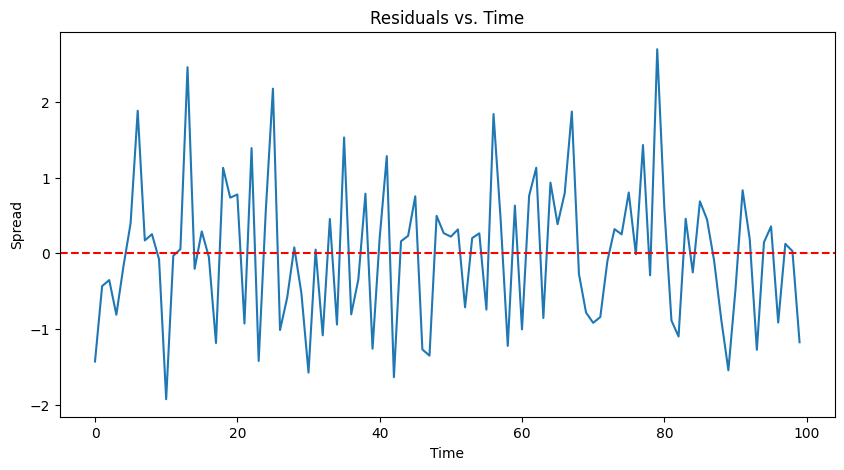

In [4]:
np.random.seed(42)
n = 100
# x is a random walk
asset_x = np.random.normal(0, 1, n).cumsum() + 50
# y is linked to x with a hedge ratio of 1.5 + noise
true_beta = 1.5
noise = np.random.normal(0, 1, n)
asset_y = (true_beta * asset_x) + 20 + noise

# we run OLS to find beta
# y = alpha + (beta * x) + error
X = asset_x
Y = asset_y

# IMPORTANT: statsmodels requires you to explicitly add a constant column for the intercept!!
X_with_const = sm.add_constant(X)

model = sm.OLS(Y, X_with_const).fit()

print(model.summary())

# extract coefficients <intercept, slope/beta>
alpha = model.params[0]
beta = model.params[1]

print(f"\nCalculated Hedge Ratio (Beta): {beta:.4f}")
print(f"Calculated Intercept (Alpha): {alpha:.4f}")

# spread/residuals
spread = Y - (beta * X + alpha)

plt.figure(figsize=(10, 5))
plt.plot(spread)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs. Time")
plt.xlabel("Time")
plt.ylabel("Spread")
plt.show()